# Лабораторная работа № 3. Предсказание цены на автомобиль

Выполнил: Голдобин Илья N34523

Задачи работы:
   1. Закончить этап подготовки данных
   2. Построить алгоритм предсказания цены на автомобиль
   3. Оценить точность прогноза

## Обработка данных

Импортируем библиотеки и метрики качества моделей

In [76]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Загружаем файл с данными, прошедшими обработку из Lesson_2_1_ITMO

In [77]:
df_car = pd.read_csv('vehichles_lab.csv')
df_car

,Unnamed: 0,id,region,price,year,manufacturer,model,cylinders,fuel,odometer,...,transmission,drive,type,paint_color,state,lat,long,posting_date,url_split,region_url_split
0,0,7240372487,auburn,35990,2010.0,chevrolet,corvette grand sport,8 cylinders,gas,32742.0,...,other,rwd,other,NaN,al,32.590000,-85.480000,2020-12-02T08:11:30-0600,auburn,auburn
1,1,7240309422,auburn,7500,2014.0,hyundai,sonata,4 cylinders,gas,93600.0,...,automatic,fwd,sedan,NaN,al,32.547500,-85.468200,2020-12-02T02:11:50-0600,auburn,auburn
2,2,7240224296,auburn,4900,2006.0,bmw,x3 3.0i,6 cylinders,gas,87046.0,...,automatic,NaN,SUV,blue,al,32.616807,-85.464149,2020-12-01T19:50:41-0600,auburn,auburn
3,3,7240103965,auburn,2000,1974.0,chevrolet,c-10,4 cylinders,gas,190000.0,...,automatic,rwd,pickup,blue,al,32.861600,-85.216100,2020-12-01T15:54:45-0600,auburn,auburn
4,4,7239983776,auburn,19500,2005.0,ford,f350 lariat,8 cylinders,diesel,116000.0,...,automatic,4wd,pickup,blue,al,32.547500,-85.468200,2020-12-01T12:53:56-0600,auburn,auburn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421118,458208,7240959076,wausau,14995,2014.0,cadillac,srx,6 cylinders,gas,83790.0,...,automatic,4wd,SUV,silver,wi,44.408867,-89.881210,2020-12-03T08:56:29-0600,wausau,wausau
421119,458209,7240954682,wausau,17895,2018.0,hyundai,tucson,4 cylinders,gas,31888.0,...,automatic,4wd,SUV,white,wi,44.408867,-89.882240,2020-12-03T08:48:08-0600,wausau,wausau
421120,458210,7240645700,wyoming,17900,2014.0,cadillac,cts coupe awd,6 cylinders,gas,53000.0,...,automatic,4wd,coupe,black,wy,44.784900,-106.964800,2020-12-02T14:09:45-0700,wyoming,wyoming
421121,458211,7240600465,wyoming,1300,2008.0,jeep,grand cherokee,8 cylinders,gas,164000.0,...,automatic,4wd,SUV,white,wy,44.773500,-106.939600,2020-12-02T13:01:04-0700,wyoming,wyoming


Добавился столбец с идентификаторами из изначального необработанного файла с данными, удалим его

In [78]:
df_car = df_car.drop('Unnamed: 0', axis=1)
df_car

,id,region,price,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date,url_split,region_url_split
0,7240372487,auburn,35990,2010.0,chevrolet,corvette grand sport,8 cylinders,gas,32742.0,clean,other,rwd,other,NaN,al,32.590000,-85.480000,2020-12-02T08:11:30-0600,auburn,auburn
1,7240309422,auburn,7500,2014.0,hyundai,sonata,4 cylinders,gas,93600.0,clean,automatic,fwd,sedan,NaN,al,32.547500,-85.468200,2020-12-02T02:11:50-0600,auburn,auburn
2,7240224296,auburn,4900,2006.0,bmw,x3 3.0i,6 cylinders,gas,87046.0,clean,automatic,NaN,SUV,blue,al,32.616807,-85.464149,2020-12-01T19:50:41-0600,auburn,auburn
3,7240103965,auburn,2000,1974.0,chevrolet,c-10,4 cylinders,gas,190000.0,clean,automatic,rwd,pickup,blue,al,32.861600,-85.216100,2020-12-01T15:54:45-0600,auburn,auburn
4,7239983776,auburn,19500,2005.0,ford,f350 lariat,8 cylinders,diesel,116000.0,lien,automatic,4wd,pickup,blue,al,32.547500,-85.468200,2020-12-01T12:53:56-0600,auburn,auburn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421118,7240959076,wausau,14995,2014.0,cadillac,srx,6 cylinders,gas,83790.0,clean,automatic,4wd,SUV,silver,wi,44.408867,-89.881210,2020-12-03T08:56:29-0600,wausau,wausau
421119,7240954682,wausau,17895,2018.0,hyundai,tucson,4 cylinders,gas,31888.0,clean,automatic,4wd,SUV,white,wi,44.408867,-89.882240,2020-12-03T08:48:08-0600,wausau,wausau
421120,7240645700,wyoming,17900,2014.0,cadillac,cts coupe awd,6 cylinders,gas,53000.0,clean,automatic,4wd,coupe,black,wy,44.784900,-106.964800,2020-12-02T14:09:45-0700,wyoming,wyoming
421121,7240600465,wyoming,1300,2008.0,jeep,grand cherokee,8 cylinders,gas,164000.0,clean,automatic,4wd,SUV,white,wy,44.773500,-106.939600,2020-12-02T13:01:04-0700,wyoming,wyoming


В процессе обработки данных были добавлены столбцы url_split и region_url_split, в которых содержатся значения региона, вытащенные из url и region_url соответственно

Проверим есть ли расхождения в значениях столбцов region_url_split, url_split, region

In [79]:
np.array_equal(df_car['url_split'], 
               df_car['region'])

False

In [80]:
np.array_equal(df_car['region_url_split'], 
               df_car['region'])

False

In [81]:
np.array_equal(df_car['url_split'], 
               df_car['region_url_split'])

False

Есть различия в значениях региона, рассмотрим их

In [82]:
df_car[(df_car['url_split']!=df_car['region']) | (df_car['region_url_split']!=df_car['region']) |(df_car['url_split']!=df_car['region_url_split'])][['region', 'url_split', 'region_url_split']].value_counts()

region                 url_split    region_url_split
las vegas              lasvegas     lasvegas            2957
grand rapids           grandrapids  grandrapids         2944
tampa bay area         tampa        tampa               2942
central NJ             cnj          cnj                 2938
ft myers / SW florida  fortmyers    fortmyers           2901
                                                        ... 
owensboro              westky       owensboro              1
catskills              poconos      catskills              1
logan                  eastidaho    logan                  1
twin tiers NY/PA       buffalo      twintiers              1
la salle co            quadcities   lasalle                1
Length: 363, dtype: int64

Видим, что отличия по большей части заключаются в написании

Рассмотрим частоту появления опеределенных значений в столбцах

In [83]:
df_car['region'].value_counts()

columbus               3544
rochester              3475
jacksonville           3193
las vegas              2957
grand rapids           2944
                       ... 
siskiyou county          22
susanville               15
west virginia (old)      11
fort smith, AR           10
sioux city, IA            1
Name: region, Length: 405, dtype: int64

In [84]:
df_car['url_split'].value_counts()

lasvegas       2957
grandrapids    2944
tampa          2942
cnj            2938
nashville      2913
               ... 
swks             12
wv               11
susanville       11
csd               9
houma             6
Name: url_split, Length: 413, dtype: int64

In [85]:
df_car['region_url_split'].value_counts()

lasvegas       2957
grandrapids    2944
tampa          2942
cnj            2938
nashville      2908
               ... 
northplatte      27
natchez          24
siskiyou         22
susanville       15
wv               11
Name: region_url_split, Length: 413, dtype: int64

Видим, что в столбце region часто встречается значение rochester, однако в url_split и region_url_split не видим такое значение, рассмотрим это

In [86]:
df_car[df_car['region'] == 'rochester']

,id,region,price,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date,url_split,region_url_split
200086,7240812967,rochester,7600,2012.0,chrysler,town & country,NaN,gas,115000.0,clean,automatic,NaN,NaN,NaN,mn,44.049600,-92.489600,2020-12-02T20:56:15-0600,rmn,rmn
200087,7240785299,rochester,3500,2010.0,hyundai,sonata,4 cylinders,gas,102000.0,clean,automatic,fwd,sedan,NaN,mn,44.049600,-92.489600,2020-12-02T19:38:02-0600,rmn,rmn
200088,7240695734,rochester,5700,2012.0,volkswagen,passat,4 cylinders,diesel,140000.0,clean,automatic,fwd,sedan,NaN,mn,42.484503,-92.324974,2020-12-02T16:31:04-0600,rmn,rmn
200089,7240695584,rochester,28999,2018.0,toyota,tacoma,6 cylinders,gas,55000.0,clean,automatic,4wd,pickup,NaN,mn,42.484503,-92.324974,2020-12-02T16:30:49-0600,rmn,rmn
200090,7240695402,rochester,5999,2014.0,nissan,altima,4 cylinders,gas,54000.0,clean,automatic,fwd,sedan,NaN,mn,42.484503,-92.324974,2020-12-02T16:30:33-0600,rmn,rmn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417438,7240898510,rochester,8450,2014.0,dodge,grand caravan sxt,6 cylinders,gas,103000.0,clean,automatic,fwd,mini-van,black,ny,43.242100,-77.170000,2020-12-03T07:10:27-0500,rochester,rochester
417439,7240889118,rochester,8995,2013.0,chevrolet,traverse,6 cylinders,gas,106000.0,clean,automatic,fwd,SUV,grey,ny,43.229100,-77.308800,2020-12-03T06:07:56-0500,rochester,rochester
417440,7240874511,rochester,700,2004.0,honda,civic,4 cylinders,gas,227700.0,clean,automatic,NaN,NaN,green,ny,43.234600,-77.657700,2020-12-03T03:21:03-0500,rochester,rochester
417441,7240857363,rochester,5500,2012.0,ford,escape,NaN,gas,121780.0,clean,automatic,NaN,NaN,NaN,ny,43.149653,-77.659884,2020-12-03T01:00:09-0500,rochester,rochester


В столбцах url_split и region_url_split значения разные при том, что везде region=rochester. Это объясняется тем, что названия городов в сша зачастую встречаются несколько раз в разных регионах

Аналогичная ситуация с городом columbus

In [87]:
df_car[df_car['region'] == 'columbus']

,id,region,price,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date,url_split,region_url_split
111158,7240679359,columbus,5999,2009.0,honda,accord,NaN,gas,184000.0,clean,automatic,NaN,NaN,NaN,ga,32.561600,-84.85590,2020-12-02T17:03:18-0500,columbusga,columbusga
111159,7240675255,columbus,5500,2012.0,hyundai,accent,4 cylinders,gas,124736.0,clean,automatic,fwd,coupe,blue,ga,32.536900,-84.92740,2020-12-02T16:57:03-0500,columbusga,columbusga
111160,7240668506,columbus,8995,2010.0,chevrolet,camaro,NaN,gas,176000.0,clean,automatic,NaN,NaN,NaN,ga,32.561600,-84.85590,2020-12-02T16:45:50-0500,columbusga,columbusga
111161,7240667362,columbus,5500,2013.0,chevrolet,malibu,NaN,gas,184000.0,clean,automatic,NaN,NaN,NaN,ga,32.561600,-84.85590,2020-12-02T16:43:59-0500,columbusga,columbusga
111162,7240666965,columbus,8995,2014.0,nissan,maxima,NaN,gas,114000.0,clean,automatic,NaN,NaN,NaN,ga,32.561600,-84.85590,2020-12-02T16:43:19-0500,columbusga,columbusga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418043,7240648054,columbus,3000,2006.0,jeep,grand cherokee laredo,6 cylinders,gas,161318.0,clean,automatic,4wd,SUV,white,oh,39.995200,-83.00470,2020-12-02T16:13:35-0500,columbus,columbus
418044,7240647689,columbus,14784,2014.0,honda,pilot,6 cylinders,gas,132607.0,clean,automatic,4wd,SUV,white,oh,41.125860,-81.50798,2020-12-02T16:13:01-0500,columbus,columbus
418045,7239338919,columbus,18787,2016.0,lexus,es,NaN,other,108599.0,clean,NaN,fwd,sedan,white,oh,39.884800,-82.96756,2020-11-30T12:42:44-0500,columbus,columbus
418046,7235206207,columbus,3995,2008.0,kia,amanti,6 cylinders,gas,125000.0,clean,automatic,fwd,sedan,white,oh,39.955817,-82.77777,2020-11-22T10:45:04-0500,columbus,columbus


Для таких ситуаций у нас есть столбец state с названием штата, по значению которого можем определять разные города с одинаковыми названиями

В итоге получается, что url_split и region_url_split отличаются от region либо форматом записи либо тем, что содержат значение state.

Теперь рассмотрим различия между столбцами url_split и region_url_split

In [88]:
df_car[df_car['url_split']!=df_car['region_url_split']]

,id,region,price,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date,url_split,region_url_split
125624,7240703451,mattoon-charleston,15900,2014.0,dodge,grand caravan,6 cylinders,gas,123138.0,clean,automatic,fwd,van,white,il,42.196156,-88.310560,2020-12-02T16:44:24-0600,springfieldil,mattoon
125625,7240758957,mattoon-charleston,700,2002.0,chevrolet,blazer,NaN,gas,150000.0,clean,automatic,NaN,NaN,black,il,39.289100,-86.778900,2020-12-02T19:36:40-0500,bloomington,mattoon
125626,7240706119,mattoon-charleston,7800,2015.0,NaN,Malibu LS,4 cylinders,gas,127000.0,clean,automatic,fwd,NaN,NaN,il,39.126300,-86.576900,2020-12-02T17:49:10-0500,bloomington,mattoon
125627,7240700424,mattoon-charleston,2400,2007.0,ford,focus,4 cylinders,gas,170000.0,clean,automatic,NaN,sedan,red,il,39.126300,-86.576900,2020-12-02T17:39:03-0500,bloomington,mattoon
125628,7240695733,mattoon-charleston,2500,2004.0,nissan,quest 3.5 s,6 cylinders,gas,171000.0,clean,automatic,fwd,mini-van,silver,il,39.126300,-86.576900,2020-12-02T17:31:04-0500,bloomington,mattoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420549,7241013771,southwest VA,26500,2016.0,bmw,x5 xdrive35i,6 cylinders,gas,95048.0,clean,automatic,4wd,SUV,grey,va,36.201045,-81.662226,2020-12-03T11:24:51-0500,boone,swva
420550,7241018426,southwest VA,17999,2015.0,honda,cr-v,4 cylinders,gas,82367.0,clean,automatic,NaN,NaN,blue,va,35.711759,-82.565356,2020-12-03T11:31:31-0500,asheville,swva
420551,7241014602,southwest VA,15990,2016.0,jeep,renegade sport suv 4d,NaN,gas,31061.0,clean,other,NaN,other,blue,va,35.570000,-82.540000,2020-12-03T11:26:03-0500,asheville,swva
420552,7241013127,southwest VA,31990,2018.0,gmc,sierra 1500 double cab sle,6 cylinders,gas,20288.0,clean,other,4wd,pickup,black,va,35.570000,-82.540000,2020-12-03T11:23:54-0500,asheville,swva


Во всех столбцах записаны разные значения,  рассмотрим например строку с id=125626. Здесь в регионе записаны 2 города, которые расположены рядом, в region_url_split записан один из этих городов, а в url_split записан город который расположен на значительном расстоянии от записанных городов. 


Если рассмотреть последние строки, то видим в url_split Город asheville и state=va. Однако в штате va есть город ashville, но не asheville, т. е. в столбце url_split указаны некорректные данные

Исходя из всего выше описанного, кажется разумным удалить столбцы url_split и region_url_split, т. к. они вносят большое количество неточностей и работать с ними сильно труднее, чем с просто столбцом region, а с наличием столбца state мы не потеряем при удалении информации о штате

In [89]:
df_car = df_car.drop(columns=['url_split', 'region_url_split'], axis=1)
df_car

,id,region,price,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date
0,7240372487,auburn,35990,2010.0,chevrolet,corvette grand sport,8 cylinders,gas,32742.0,clean,other,rwd,other,NaN,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,7240309422,auburn,7500,2014.0,hyundai,sonata,4 cylinders,gas,93600.0,clean,automatic,fwd,sedan,NaN,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,7240224296,auburn,4900,2006.0,bmw,x3 3.0i,6 cylinders,gas,87046.0,clean,automatic,NaN,SUV,blue,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,7240103965,auburn,2000,1974.0,chevrolet,c-10,4 cylinders,gas,190000.0,clean,automatic,rwd,pickup,blue,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,7239983776,auburn,19500,2005.0,ford,f350 lariat,8 cylinders,diesel,116000.0,lien,automatic,4wd,pickup,blue,al,32.547500,-85.468200,2020-12-01T12:53:56-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421118,7240959076,wausau,14995,2014.0,cadillac,srx,6 cylinders,gas,83790.0,clean,automatic,4wd,SUV,silver,wi,44.408867,-89.881210,2020-12-03T08:56:29-0600
421119,7240954682,wausau,17895,2018.0,hyundai,tucson,4 cylinders,gas,31888.0,clean,automatic,4wd,SUV,white,wi,44.408867,-89.882240,2020-12-03T08:48:08-0600
421120,7240645700,wyoming,17900,2014.0,cadillac,cts coupe awd,6 cylinders,gas,53000.0,clean,automatic,4wd,coupe,black,wy,44.784900,-106.964800,2020-12-02T14:09:45-0700
421121,7240600465,wyoming,1300,2008.0,jeep,grand cherokee,8 cylinders,gas,164000.0,clean,automatic,4wd,SUV,white,wy,44.773500,-106.939600,2020-12-02T13:01:04-0700


Рассмотрим количество пропусков в столбцах

In [90]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421123 entries, 0 to 421122
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            421123 non-null  int64  
 1   region        421123 non-null  object 
 2   price         421123 non-null  int64  
 3   year          421123 non-null  float64
 4   manufacturer  404715 non-null  object 
 5   model         416835 non-null  object 
 6   cylinders     267809 non-null  object 
 7   fuel          418600 non-null  object 
 8   odometer      421123 non-null  float64
 9   title_status  419231 non-null  object 
 10  transmission  419359 non-null  object 
 11  drive         298885 non-null  object 
 12  type          316484 non-null  object 
 13  paint_color   294063 non-null  object 
 14  state         421123 non-null  object 
 15  lat           421123 non-null  float64
 16  long          421123 non-null  float64
 17  posting_date  421123 non-null  object 
dtypes: f

Удалим пропуски в тех столбцах, где более 400 000 не nan значений

Столбец manufacturer мы могли бы заполнить исходя из значений model, однако это требует большой ручной работы, поэтому, учитываю малое число пропусков, можно удалить их

In [91]:
df_car[df_car['manufacturer'].isnull()]['model'].value_counts()

Isuzu NPR HD GAS REG                267
Isuzu NPR                           251
International 4300                  247
PROGRAMS as little as $500 DOWN!    131
scion tc                            117
                                   ... 
2106 F150 Extended Cab                1
378 Petetbilt                         1
ai Accent                             1
Model A Sedan                         1
bluebird 4300                         1
Name: model, Length: 6249, dtype: int64

In [92]:
df_car[df_car['manufacturer'].isnull()]['model'].nunique()

6249

Из-за различий в формате записи моделей, требуется в ручную выцеплять из них наименования производителя, поэтому проще удалить

In [93]:
df_car = df_car.dropna(subset=['manufacturer'])

In [94]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404715 entries, 0 to 421121
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            404715 non-null  int64  
 1   region        404715 non-null  object 
 2   price         404715 non-null  int64  
 3   year          404715 non-null  float64
 4   manufacturer  404715 non-null  object 
 5   model         400431 non-null  object 
 6   cylinders     258216 non-null  object 
 7   fuel          402448 non-null  object 
 8   odometer      404715 non-null  float64
 9   title_status  403138 non-null  object 
 10  transmission  403077 non-null  object 
 11  drive         289533 non-null  object 
 12  type          306645 non-null  object 
 13  paint_color   283551 non-null  object 
 14  state         404715 non-null  object 
 15  lat           404715 non-null  float64
 16  long          404715 non-null  float64
 17  posting_date  404715 non-null  object 
dtypes: f

Также поступим и с отсальными столбцами, где пропусков немного

In [95]:
df_car = df_car.dropna(subset=['model', 'fuel', 'title_status', 'transmission'])

In [96]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395899 entries, 0 to 421121
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            395899 non-null  int64  
 1   region        395899 non-null  object 
 2   price         395899 non-null  int64  
 3   year          395899 non-null  float64
 4   manufacturer  395899 non-null  object 
 5   model         395899 non-null  object 
 6   cylinders     254739 non-null  object 
 7   fuel          395899 non-null  object 
 8   odometer      395899 non-null  float64
 9   title_status  395899 non-null  object 
 10  transmission  395899 non-null  object 
 11  drive         284260 non-null  object 
 12  type          300633 non-null  object 
 13  paint_color   278430 non-null  object 
 14  state         395899 non-null  object 
 15  lat           395899 non-null  float64
 16  long          395899 non-null  float64
 17  posting_date  395899 non-null  object 
dtypes: f

Остались столбцы с большим числом пропусков, которые просто так не удалить

In [97]:
df_car

,id,region,price,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date
0,7240372487,auburn,35990,2010.0,chevrolet,corvette grand sport,8 cylinders,gas,32742.0,clean,other,rwd,other,NaN,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,7240309422,auburn,7500,2014.0,hyundai,sonata,4 cylinders,gas,93600.0,clean,automatic,fwd,sedan,NaN,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,7240224296,auburn,4900,2006.0,bmw,x3 3.0i,6 cylinders,gas,87046.0,clean,automatic,NaN,SUV,blue,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,7240103965,auburn,2000,1974.0,chevrolet,c-10,4 cylinders,gas,190000.0,clean,automatic,rwd,pickup,blue,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,7239983776,auburn,19500,2005.0,ford,f350 lariat,8 cylinders,diesel,116000.0,lien,automatic,4wd,pickup,blue,al,32.547500,-85.468200,2020-12-01T12:53:56-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421117,7240964712,wausau,19950,2017.0,audi,a4 premium plus quattro awd,NaN,gas,101270.0,clean,automatic,NaN,NaN,NaN,wi,44.843195,-91.550371,2020-12-03T09:06:21-0600
421118,7240959076,wausau,14995,2014.0,cadillac,srx,6 cylinders,gas,83790.0,clean,automatic,4wd,SUV,silver,wi,44.408867,-89.881210,2020-12-03T08:56:29-0600
421119,7240954682,wausau,17895,2018.0,hyundai,tucson,4 cylinders,gas,31888.0,clean,automatic,4wd,SUV,white,wi,44.408867,-89.882240,2020-12-03T08:48:08-0600
421120,7240645700,wyoming,17900,2014.0,cadillac,cts coupe awd,6 cylinders,gas,53000.0,clean,automatic,4wd,coupe,black,wy,44.784900,-106.964800,2020-12-02T14:09:45-0700


Удалим столбец id, т. к. он не несет важной информации

In [98]:
df_car = df_car.drop('id', axis=1)
df_car

,region,price,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date
0,auburn,35990,2010.0,chevrolet,corvette grand sport,8 cylinders,gas,32742.0,clean,other,rwd,other,NaN,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,auburn,7500,2014.0,hyundai,sonata,4 cylinders,gas,93600.0,clean,automatic,fwd,sedan,NaN,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,auburn,4900,2006.0,bmw,x3 3.0i,6 cylinders,gas,87046.0,clean,automatic,NaN,SUV,blue,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,auburn,2000,1974.0,chevrolet,c-10,4 cylinders,gas,190000.0,clean,automatic,rwd,pickup,blue,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,auburn,19500,2005.0,ford,f350 lariat,8 cylinders,diesel,116000.0,lien,automatic,4wd,pickup,blue,al,32.547500,-85.468200,2020-12-01T12:53:56-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421117,wausau,19950,2017.0,audi,a4 premium plus quattro awd,NaN,gas,101270.0,clean,automatic,NaN,NaN,NaN,wi,44.843195,-91.550371,2020-12-03T09:06:21-0600
421118,wausau,14995,2014.0,cadillac,srx,6 cylinders,gas,83790.0,clean,automatic,4wd,SUV,silver,wi,44.408867,-89.881210,2020-12-03T08:56:29-0600
421119,wausau,17895,2018.0,hyundai,tucson,4 cylinders,gas,31888.0,clean,automatic,4wd,SUV,white,wi,44.408867,-89.882240,2020-12-03T08:48:08-0600
421120,wyoming,17900,2014.0,cadillac,cts coupe awd,6 cylinders,gas,53000.0,clean,automatic,4wd,coupe,black,wy,44.784900,-106.964800,2020-12-02T14:09:45-0700


В столбце cylinders содержится текст, переведем в числовой формат

Достанем из значений число

In [99]:
df_car['cylinders'] = df_car[df_car['cylinders'].notna()]['cylinders'].apply(lambda x: x.split(' ')[0])

In [100]:
df_car['cylinders'].value_counts()

6        95233
4        84562
8        70604
5         1807
10        1395
other      693
3          353
12          92
Name: cylinders, dtype: int64

Есть 693 значения other, не понятно какое число можно сопоставить с этим значением, и таких значений мало, поэтому удалим

In [101]:
df_car = df_car[df_car['cylinders'] != 'other']
df_car['cylinders'].value_counts()

6     95233
4     84562
8     70604
5      1807
10     1395
3       353
12       92
Name: cylinders, dtype: int64

Поменяем тип данных на целочисленный

In [102]:
df_car[df_car['cylinders'].notna()]['cylinders'].astype('int')

0         8
1         4
2         6
3         4
4         8
         ..
421116    4
421118    6
421119    4
421120    6
421121    8
Name: cylinders, Length: 254046, dtype: int32

Рассмотрим гистограмму по количеству цилиндров

<AxesSubplot: >

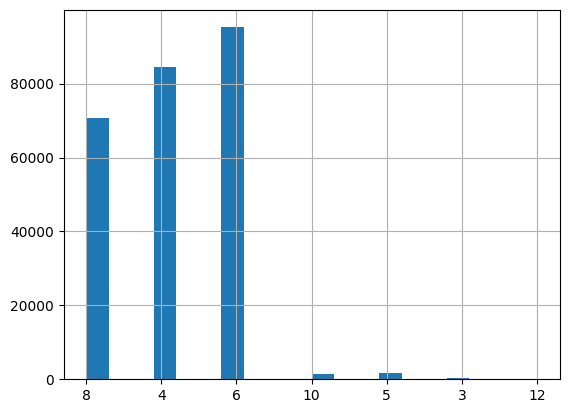

In [103]:
df_car['cylinders'].hist(bins=20)

In [104]:
df_car['cylinders'].value_counts()

6     95233
4     84562
8     70604
5      1807
10     1395
3       353
12       92
Name: cylinders, dtype: int64

Заполним nan на 6, т. к. это самое частое значение

In [105]:
df_car['cylinders'] = df_car['cylinders'].fillna(6)
df_car['cylinders']

C:\Users\yxtag\AppData\Local\Temp\ipykernel_10420\669809327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car['cylinders'] = df_car['cylinders'].fillna(6)


0         8
1         4
2         6
3         4
4         8
         ..
421117    6
421118    6
421119    4
421120    6
421121    8
Name: cylinders, Length: 395206, dtype: object

In [106]:
df_car['cylinders'].value_counts()

6     141160
6      95233
4      84562
8      70604
5       1807
10      1395
3        353
12        92
Name: cylinders, dtype: int64

Замена проведена


In [107]:
df_car

,region,price,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date
0,auburn,35990,2010.0,chevrolet,corvette grand sport,8,gas,32742.0,clean,other,rwd,other,NaN,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,auburn,7500,2014.0,hyundai,sonata,4,gas,93600.0,clean,automatic,fwd,sedan,NaN,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,auburn,4900,2006.0,bmw,x3 3.0i,6,gas,87046.0,clean,automatic,NaN,SUV,blue,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,auburn,2000,1974.0,chevrolet,c-10,4,gas,190000.0,clean,automatic,rwd,pickup,blue,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,auburn,19500,2005.0,ford,f350 lariat,8,diesel,116000.0,lien,automatic,4wd,pickup,blue,al,32.547500,-85.468200,2020-12-01T12:53:56-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421117,wausau,19950,2017.0,audi,a4 premium plus quattro awd,6,gas,101270.0,clean,automatic,NaN,NaN,NaN,wi,44.843195,-91.550371,2020-12-03T09:06:21-0600
421118,wausau,14995,2014.0,cadillac,srx,6,gas,83790.0,clean,automatic,4wd,SUV,silver,wi,44.408867,-89.881210,2020-12-03T08:56:29-0600
421119,wausau,17895,2018.0,hyundai,tucson,4,gas,31888.0,clean,automatic,4wd,SUV,white,wi,44.408867,-89.882240,2020-12-03T08:48:08-0600
421120,wyoming,17900,2014.0,cadillac,cts coupe awd,6,gas,53000.0,clean,automatic,4wd,coupe,black,wy,44.784900,-106.964800,2020-12-02T14:09:45-0700


In [108]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395206 entries, 0 to 421121
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        395206 non-null  object 
 1   price         395206 non-null  int64  
 2   year          395206 non-null  float64
 3   manufacturer  395206 non-null  object 
 4   model         395206 non-null  object 
 5   cylinders     395206 non-null  object 
 6   fuel          395206 non-null  object 
 7   odometer      395206 non-null  float64
 8   title_status  395206 non-null  object 
 9   transmission  395206 non-null  object 
 10  drive         283701 non-null  object 
 11  type          300027 non-null  object 
 12  paint_color   277826 non-null  object 
 13  state         395206 non-null  object 
 14  lat           395206 non-null  float64
 15  long          395206 non-null  float64
 16  posting_date  395206 non-null  object 
dtypes: float64(4), int64(1), object(12)
memory usage

Рассмотрим столбец drive

In [109]:
df_car['drive'].unique()

array(['rwd', 'fwd', nan, '4wd'], dtype=object)

In [110]:
df_car['drive'].value_counts()

4wd    123924
fwd    107949
rwd     51828
Name: drive, dtype: int64

In [111]:
df_car['drive'].isna().sum()

111505

<AxesSubplot: >

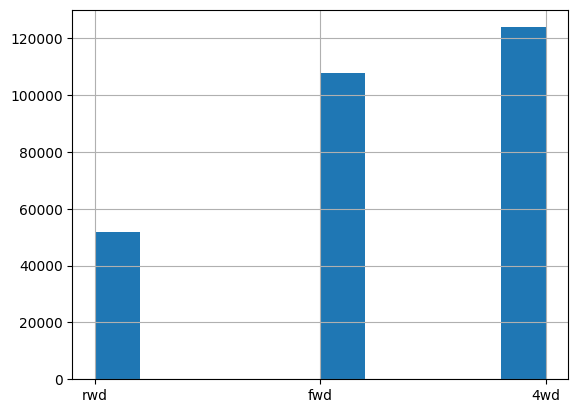

In [112]:
df_car['drive'].hist()

Заполним nan значения на специальные значения "unknown"

In [113]:
df_car['drive'] = df_car['drive'].fillna('unknown')
df_car['drive']

C:\Users\yxtag\AppData\Local\Temp\ipykernel_10420\386330078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car['drive'] = df_car['drive'].fillna('unknown')


0             rwd
1             fwd
2         unknown
3             rwd
4             4wd
           ...   
421117    unknown
421118        4wd
421119        4wd
421120        4wd
421121        4wd
Name: drive, Length: 395206, dtype: object

In [114]:
df_car

,region,price,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date
0,auburn,35990,2010.0,chevrolet,corvette grand sport,8,gas,32742.0,clean,other,rwd,other,NaN,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,auburn,7500,2014.0,hyundai,sonata,4,gas,93600.0,clean,automatic,fwd,sedan,NaN,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,auburn,4900,2006.0,bmw,x3 3.0i,6,gas,87046.0,clean,automatic,unknown,SUV,blue,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,auburn,2000,1974.0,chevrolet,c-10,4,gas,190000.0,clean,automatic,rwd,pickup,blue,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,auburn,19500,2005.0,ford,f350 lariat,8,diesel,116000.0,lien,automatic,4wd,pickup,blue,al,32.547500,-85.468200,2020-12-01T12:53:56-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421117,wausau,19950,2017.0,audi,a4 premium plus quattro awd,6,gas,101270.0,clean,automatic,unknown,NaN,NaN,wi,44.843195,-91.550371,2020-12-03T09:06:21-0600
421118,wausau,14995,2014.0,cadillac,srx,6,gas,83790.0,clean,automatic,4wd,SUV,silver,wi,44.408867,-89.881210,2020-12-03T08:56:29-0600
421119,wausau,17895,2018.0,hyundai,tucson,4,gas,31888.0,clean,automatic,4wd,SUV,white,wi,44.408867,-89.882240,2020-12-03T08:48:08-0600
421120,wyoming,17900,2014.0,cadillac,cts coupe awd,6,gas,53000.0,clean,automatic,4wd,coupe,black,wy,44.784900,-106.964800,2020-12-02T14:09:45-0700


In [115]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395206 entries, 0 to 421121
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        395206 non-null  object 
 1   price         395206 non-null  int64  
 2   year          395206 non-null  float64
 3   manufacturer  395206 non-null  object 
 4   model         395206 non-null  object 
 5   cylinders     395206 non-null  object 
 6   fuel          395206 non-null  object 
 7   odometer      395206 non-null  float64
 8   title_status  395206 non-null  object 
 9   transmission  395206 non-null  object 
 10  drive         395206 non-null  object 
 11  type          300027 non-null  object 
 12  paint_color   277826 non-null  object 
 13  state         395206 non-null  object 
 14  lat           395206 non-null  float64
 15  long          395206 non-null  float64
 16  posting_date  395206 non-null  object 
dtypes: float64(4), int64(1), object(12)
memory usage

Следующий столбец с пропусками - type

In [116]:
df_car['type'].unique()

array(['other', 'sedan', 'SUV', 'pickup', 'coupe', 'van', nan, 'mini-van',
       'wagon', 'convertible', 'hatchback', 'truck', 'offroad', 'bus'],
      dtype=object)

In [117]:
df_car['type'].value_counts()

sedan          81296
SUV            70120
pickup         39111
truck          28006
other          20176
coupe          16562
hatchback      14492
wagon           9314
van             8413
convertible     5844
mini-van        5757
offroad          552
bus              384
Name: type, dtype: int64

In [118]:
df_car['type'].isna().sum()

95179

Заменим пропуски на самую популярную категорию - sedan

In [119]:
df_car['type'] = df_car['type'].fillna('sedan')
df_car['type'].value_counts()

C:\Users\yxtag\AppData\Local\Temp\ipykernel_10420\1595371468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car['type'] = df_car['type'].fillna('sedan')


sedan          176475
SUV             70120
pickup          39111
truck           28006
other           20176
coupe           16562
hatchback       14492
wagon            9314
van              8413
convertible      5844
mini-van         5757
offroad           552
bus               384
Name: type, dtype: int64

In [120]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395206 entries, 0 to 421121
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        395206 non-null  object 
 1   price         395206 non-null  int64  
 2   year          395206 non-null  float64
 3   manufacturer  395206 non-null  object 
 4   model         395206 non-null  object 
 5   cylinders     395206 non-null  object 
 6   fuel          395206 non-null  object 
 7   odometer      395206 non-null  float64
 8   title_status  395206 non-null  object 
 9   transmission  395206 non-null  object 
 10  drive         395206 non-null  object 
 11  type          395206 non-null  object 
 12  paint_color   277826 non-null  object 
 13  state         395206 non-null  object 
 14  lat           395206 non-null  float64
 15  long          395206 non-null  float64
 16  posting_date  395206 non-null  object 
dtypes: float64(4), int64(1), object(12)
memory usage

Остался столбец paint_color

In [121]:
df_car['paint_color'].unique()

array([nan, 'blue', 'red', 'silver', 'black', 'white', 'grey', 'orange',
       'green', 'yellow', 'custom', 'brown', 'purple'], dtype=object)

In [122]:
df_car['paint_color'].value_counts()

white     69499
black     56762
silver    41517
red       29810
blue      29189
grey      27114
custom     7949
green      6728
brown      5416
orange     1677
yellow     1497
purple      668
Name: paint_color, dtype: int64

In [123]:
df_car['paint_color'].isna().sum()

117380

Заполним nan-ы значение unknown, т. к. нет четко выделенного наиболее популярного цвета 

In [124]:
df_car['paint_color'] = df_car['paint_color'].fillna('unknown')
df_car['paint_color'].value_counts()

C:\Users\yxtag\AppData\Local\Temp\ipykernel_10420\3921710589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car['paint_color'] = df_car['paint_color'].fillna('unknown')


unknown    117380
white       69499
black       56762
silver      41517
red         29810
blue        29189
grey        27114
custom       7949
green        6728
brown        5416
orange       1677
yellow       1497
purple        668
Name: paint_color, dtype: int64

In [125]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395206 entries, 0 to 421121
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        395206 non-null  object 
 1   price         395206 non-null  int64  
 2   year          395206 non-null  float64
 3   manufacturer  395206 non-null  object 
 4   model         395206 non-null  object 
 5   cylinders     395206 non-null  object 
 6   fuel          395206 non-null  object 
 7   odometer      395206 non-null  float64
 8   title_status  395206 non-null  object 
 9   transmission  395206 non-null  object 
 10  drive         395206 non-null  object 
 11  type          395206 non-null  object 
 12  paint_color   395206 non-null  object 
 13  state         395206 non-null  object 
 14  lat           395206 non-null  float64
 15  long          395206 non-null  float64
 16  posting_date  395206 non-null  object 
dtypes: float64(4), int64(1), object(12)
memory usage

In [126]:
df_car

,region,price,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date
0,auburn,35990,2010.0,chevrolet,corvette grand sport,8,gas,32742.0,clean,other,rwd,other,unknown,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,auburn,7500,2014.0,hyundai,sonata,4,gas,93600.0,clean,automatic,fwd,sedan,unknown,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,auburn,4900,2006.0,bmw,x3 3.0i,6,gas,87046.0,clean,automatic,unknown,SUV,blue,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,auburn,2000,1974.0,chevrolet,c-10,4,gas,190000.0,clean,automatic,rwd,pickup,blue,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,auburn,19500,2005.0,ford,f350 lariat,8,diesel,116000.0,lien,automatic,4wd,pickup,blue,al,32.547500,-85.468200,2020-12-01T12:53:56-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421117,wausau,19950,2017.0,audi,a4 premium plus quattro awd,6,gas,101270.0,clean,automatic,unknown,sedan,unknown,wi,44.843195,-91.550371,2020-12-03T09:06:21-0600
421118,wausau,14995,2014.0,cadillac,srx,6,gas,83790.0,clean,automatic,4wd,SUV,silver,wi,44.408867,-89.881210,2020-12-03T08:56:29-0600
421119,wausau,17895,2018.0,hyundai,tucson,4,gas,31888.0,clean,automatic,4wd,SUV,white,wi,44.408867,-89.882240,2020-12-03T08:48:08-0600
421120,wyoming,17900,2014.0,cadillac,cts coupe awd,6,gas,53000.0,clean,automatic,4wd,coupe,black,wy,44.784900,-106.964800,2020-12-02T14:09:45-0700


Осталось разложить дату поста

In [127]:
df_car['posting year'] = df_car['posting_date'].apply(lambda x: x[:4]).astype('int')
df_car['posting month'] = df_car['posting_date'].apply(lambda x: x[5:7]).astype('int')
df_car['posting day'] = df_car['posting_date'].apply(lambda x: x[8:10]).astype('int')
df_car

C:\Users\yxtag\AppData\Local\Temp\ipykernel_10420\2497315327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car['posting year'] = df_car['posting_date'].apply(lambda x: x[:4]).astype('int')
C:\Users\yxtag\AppData\Local\Temp\ipykernel_10420\2497315327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car['posting month'] = df_car['posting_date'].apply(lambda x: x[5:7]).astype('int')
C:\Users\yxtag\AppData\Local\Temp\ipykernel_10420\2497315327.py:3: SettingWithCopyWarning: 
A value is trying to b

,region,price,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date,posting year,posting month,posting day
0,auburn,35990,2010.0,chevrolet,corvette grand sport,8,gas,32742.0,clean,other,rwd,other,unknown,al,32.590000,-85.480000,2020-12-02T08:11:30-0600,2020,12,2
1,auburn,7500,2014.0,hyundai,sonata,4,gas,93600.0,clean,automatic,fwd,sedan,unknown,al,32.547500,-85.468200,2020-12-02T02:11:50-0600,2020,12,2
2,auburn,4900,2006.0,bmw,x3 3.0i,6,gas,87046.0,clean,automatic,unknown,SUV,blue,al,32.616807,-85.464149,2020-12-01T19:50:41-0600,2020,12,1
3,auburn,2000,1974.0,chevrolet,c-10,4,gas,190000.0,clean,automatic,rwd,pickup,blue,al,32.861600,-85.216100,2020-12-01T15:54:45-0600,2020,12,1
4,auburn,19500,2005.0,ford,f350 lariat,8,diesel,116000.0,lien,automatic,4wd,pickup,blue,al,32.547500,-85.468200,2020-12-01T12:53:56-0600,2020,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421117,wausau,19950,2017.0,audi,a4 premium plus quattro awd,6,gas,101270.0,clean,automatic,unknown,sedan,unknown,wi,44.843195,-91.550371,2020-12-03T09:06:21-0600,2020,12,3
421118,wausau,14995,2014.0,cadillac,srx,6,gas,83790.0,clean,automatic,4wd,SUV,silver,wi,44.408867,-89.881210,2020-12-03T08:56:29-0600,2020,12,3
421119,wausau,17895,2018.0,hyundai,tucson,4,gas,31888.0,clean,automatic,4wd,SUV,white,wi,44.408867,-89.882240,2020-12-03T08:48:08-0600,2020,12,3
421120,wyoming,17900,2014.0,cadillac,cts coupe awd,6,gas,53000.0,clean,automatic,4wd,coupe,black,wy,44.784900,-106.964800,2020-12-02T14:09:45-0700,2020,12,2


In [128]:
df_car = df_car.drop('posting_date', axis=1)
df_car

,region,price,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting year,posting month,posting day
0,auburn,35990,2010.0,chevrolet,corvette grand sport,8,gas,32742.0,clean,other,rwd,other,unknown,al,32.590000,-85.480000,2020,12,2
1,auburn,7500,2014.0,hyundai,sonata,4,gas,93600.0,clean,automatic,fwd,sedan,unknown,al,32.547500,-85.468200,2020,12,2
2,auburn,4900,2006.0,bmw,x3 3.0i,6,gas,87046.0,clean,automatic,unknown,SUV,blue,al,32.616807,-85.464149,2020,12,1
3,auburn,2000,1974.0,chevrolet,c-10,4,gas,190000.0,clean,automatic,rwd,pickup,blue,al,32.861600,-85.216100,2020,12,1
4,auburn,19500,2005.0,ford,f350 lariat,8,diesel,116000.0,lien,automatic,4wd,pickup,blue,al,32.547500,-85.468200,2020,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421117,wausau,19950,2017.0,audi,a4 premium plus quattro awd,6,gas,101270.0,clean,automatic,unknown,sedan,unknown,wi,44.843195,-91.550371,2020,12,3
421118,wausau,14995,2014.0,cadillac,srx,6,gas,83790.0,clean,automatic,4wd,SUV,silver,wi,44.408867,-89.881210,2020,12,3
421119,wausau,17895,2018.0,hyundai,tucson,4,gas,31888.0,clean,automatic,4wd,SUV,white,wi,44.408867,-89.882240,2020,12,3
421120,wyoming,17900,2014.0,cadillac,cts coupe awd,6,gas,53000.0,clean,automatic,4wd,coupe,black,wy,44.784900,-106.964800,2020,12,2


Обработка данных завершена

## Линейная регрессия

В данных есть столбец с регионом, который нет возможности разложить на dummy столбцы или перекодировать с помощью чисел, однако есть столбцы с координатами, поэтому можем удалить столбец с регионом

In [129]:
df = df_car.copy()
df = df.drop('region', axis=1)
df

,price,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting year,posting month,posting day
0,35990,2010.0,chevrolet,corvette grand sport,8,gas,32742.0,clean,other,rwd,other,unknown,al,32.590000,-85.480000,2020,12,2
1,7500,2014.0,hyundai,sonata,4,gas,93600.0,clean,automatic,fwd,sedan,unknown,al,32.547500,-85.468200,2020,12,2
2,4900,2006.0,bmw,x3 3.0i,6,gas,87046.0,clean,automatic,unknown,SUV,blue,al,32.616807,-85.464149,2020,12,1
3,2000,1974.0,chevrolet,c-10,4,gas,190000.0,clean,automatic,rwd,pickup,blue,al,32.861600,-85.216100,2020,12,1
4,19500,2005.0,ford,f350 lariat,8,diesel,116000.0,lien,automatic,4wd,pickup,blue,al,32.547500,-85.468200,2020,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421117,19950,2017.0,audi,a4 premium plus quattro awd,6,gas,101270.0,clean,automatic,unknown,sedan,unknown,wi,44.843195,-91.550371,2020,12,3
421118,14995,2014.0,cadillac,srx,6,gas,83790.0,clean,automatic,4wd,SUV,silver,wi,44.408867,-89.881210,2020,12,3
421119,17895,2018.0,hyundai,tucson,4,gas,31888.0,clean,automatic,4wd,SUV,white,wi,44.408867,-89.882240,2020,12,3
421120,17900,2014.0,cadillac,cts coupe awd,6,gas,53000.0,clean,automatic,4wd,coupe,black,wy,44.784900,-106.964800,2020,12,2


Аналогично удалим столбец state

In [130]:
df = df.drop('state', axis=1)
df

,price,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,lat,long,posting year,posting month,posting day
0,35990,2010.0,chevrolet,corvette grand sport,8,gas,32742.0,clean,other,rwd,other,unknown,32.590000,-85.480000,2020,12,2
1,7500,2014.0,hyundai,sonata,4,gas,93600.0,clean,automatic,fwd,sedan,unknown,32.547500,-85.468200,2020,12,2
2,4900,2006.0,bmw,x3 3.0i,6,gas,87046.0,clean,automatic,unknown,SUV,blue,32.616807,-85.464149,2020,12,1
3,2000,1974.0,chevrolet,c-10,4,gas,190000.0,clean,automatic,rwd,pickup,blue,32.861600,-85.216100,2020,12,1
4,19500,2005.0,ford,f350 lariat,8,diesel,116000.0,lien,automatic,4wd,pickup,blue,32.547500,-85.468200,2020,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421117,19950,2017.0,audi,a4 premium plus quattro awd,6,gas,101270.0,clean,automatic,unknown,sedan,unknown,44.843195,-91.550371,2020,12,3
421118,14995,2014.0,cadillac,srx,6,gas,83790.0,clean,automatic,4wd,SUV,silver,44.408867,-89.881210,2020,12,3
421119,17895,2018.0,hyundai,tucson,4,gas,31888.0,clean,automatic,4wd,SUV,white,44.408867,-89.882240,2020,12,3
421120,17900,2014.0,cadillac,cts coupe awd,6,gas,53000.0,clean,automatic,4wd,coupe,black,44.784900,-106.964800,2020,12,2


In [131]:
df['model'].nunique()

22982

Слишком много разных значений моделей, трудно разложить, проще оставить производителя

In [132]:
df = df.drop('model', axis=1)
df

,price,year,manufacturer,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,lat,long,posting year,posting month,posting day
0,35990,2010.0,chevrolet,8,gas,32742.0,clean,other,rwd,other,unknown,32.590000,-85.480000,2020,12,2
1,7500,2014.0,hyundai,4,gas,93600.0,clean,automatic,fwd,sedan,unknown,32.547500,-85.468200,2020,12,2
2,4900,2006.0,bmw,6,gas,87046.0,clean,automatic,unknown,SUV,blue,32.616807,-85.464149,2020,12,1
3,2000,1974.0,chevrolet,4,gas,190000.0,clean,automatic,rwd,pickup,blue,32.861600,-85.216100,2020,12,1
4,19500,2005.0,ford,8,diesel,116000.0,lien,automatic,4wd,pickup,blue,32.547500,-85.468200,2020,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421117,19950,2017.0,audi,6,gas,101270.0,clean,automatic,unknown,sedan,unknown,44.843195,-91.550371,2020,12,3
421118,14995,2014.0,cadillac,6,gas,83790.0,clean,automatic,4wd,SUV,silver,44.408867,-89.881210,2020,12,3
421119,17895,2018.0,hyundai,4,gas,31888.0,clean,automatic,4wd,SUV,white,44.408867,-89.882240,2020,12,3
421120,17900,2014.0,cadillac,6,gas,53000.0,clean,automatic,4wd,coupe,black,44.784900,-106.964800,2020,12,2


Рассмотрим количество уникальных значений в остальных текстовых столбцах

In [133]:
df['manufacturer'].nunique()

42

In [134]:
df['fuel'].nunique()

5

In [135]:
df['title_status'].nunique()

6

In [136]:
df['transmission'].nunique()

3

In [137]:
df['drive'].nunique()

4

In [138]:
df['type'].nunique()

13

In [139]:
df['paint_color'].nunique()

13

Число уникальнх значений не очень велико, данные важны, поэтому разложим на dummy столбцы

In [140]:
df1 = pd.get_dummies(df, columns=['manufacturer', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color'])
df1

,price,year,cylinders,odometer,lat,long,posting year,posting month,posting day,manufacturer_acura,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_unknown,paint_color_white,paint_color_yellow
0,35990,2010.0,8,32742.0,32.590000,-85.480000,2020,12,2,0,...,0,0,0,0,0,0,0,1,0,0
1,7500,2014.0,4,93600.0,32.547500,-85.468200,2020,12,2,0,...,0,0,0,0,0,0,0,1,0,0
2,4900,2006.0,6,87046.0,32.616807,-85.464149,2020,12,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2000,1974.0,4,190000.0,32.861600,-85.216100,2020,12,1,0,...,0,0,0,0,0,0,0,0,0,0
4,19500,2005.0,8,116000.0,32.547500,-85.468200,2020,12,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421117,19950,2017.0,6,101270.0,44.843195,-91.550371,2020,12,3,0,...,0,0,0,0,0,0,0,1,0,0
421118,14995,2014.0,6,83790.0,44.408867,-89.881210,2020,12,3,0,...,0,0,0,0,0,0,1,0,0,0
421119,17895,2018.0,4,31888.0,44.408867,-89.882240,2020,12,3,0,...,0,0,0,0,0,0,0,0,1,0
421120,17900,2014.0,6,53000.0,44.784900,-106.964800,2020,12,2,0,...,0,0,0,0,0,0,0,0,0,0


Рассмотрим матрицу корреляций

In [141]:
df1.corr()

,price,year,odometer,lat,long,posting year,posting month,posting day,manufacturer_acura,manufacturer_alfa-romeo,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_unknown,paint_color_white,paint_color_yellow
price,1.000000,0.357603,-0.437539,-0.003600,-0.084230,NaN,-0.023375,-0.008433,-0.031846,0.012630,...,-0.020076,-0.054783,-0.028457,0.014326,-0.009663,0.020829,-0.048780,-0.069272,0.103202,-0.004968
year,0.357603,1.000000,-0.366624,0.013096,-0.021083,NaN,-0.013653,-0.005621,-0.011268,-0.000617,...,-0.022959,-0.106011,0.026643,-0.014304,-0.017420,-0.021211,0.020051,-0.046710,0.065910,-0.061895
odometer,-0.437539,-0.366624,1.000000,0.004179,0.036994,NaN,0.004611,0.010099,0.022791,-0.018246,...,0.010574,0.059092,0.007312,-0.013636,0.010357,-0.035038,0.007788,0.033470,-0.013676,0.002980
lat,-0.003600,0.013096,0.004179,1.000000,-0.221838,NaN,-0.038708,0.003212,-0.002235,-0.000129,...,-0.014990,0.008952,0.002909,0.002955,0.000744,-0.001518,-0.003567,0.043616,-0.045418,-0.005239
long,-0.084230,-0.021083,0.036994,-0.221838,1.000000,NaN,-0.100546,0.051937,-0.000089,0.003927,...,-0.008423,0.010071,-0.004119,0.005870,0.002601,0.031780,0.003651,-0.051037,-0.012120,-0.002024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
paint_color_red,0.020829,-0.021211,-0.035038,-0.001518,0.031780,NaN,-0.011275,0.007559,-0.016053,0.008223,...,-0.040922,-0.037589,-0.077521,-0.018646,-0.011753,1.000000,-0.097859,-0.185656,-0.131939,-0.017613
paint_color_silver,-0.048780,0.020051,0.007788,-0.003567,0.003651,NaN,0.001292,0.000034,0.009548,-0.005986,...,-0.049086,-0.045088,-0.092987,-0.022366,-0.014098,-0.097859,1.000000,-0.222696,-0.158262,-0.021126
paint_color_unknown,-0.069272,-0.046710,0.033470,0.043616,-0.051037,NaN,-0.002358,-0.002295,0.002907,0.005193,...,-0.093125,-0.085540,-0.176412,-0.042432,-0.026746,-0.185656,-0.222696,1.000000,-0.300252,-0.040081
paint_color_white,0.103202,0.065910,-0.013676,-0.045418,-0.012120,NaN,0.011704,-0.012908,-0.007276,-0.006172,...,-0.066181,-0.060790,-0.125370,-0.030155,-0.019007,-0.131939,-0.158262,-0.300252,1.000000,-0.028484


Видно, что год никак не влияет на цену, т. к. все записи сделаны в 2020 году, поэтому удаляем столбец с годом

In [142]:
df1 = df1.drop('posting year', axis=1)
df1

,price,year,cylinders,odometer,lat,long,posting month,posting day,manufacturer_acura,manufacturer_alfa-romeo,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_unknown,paint_color_white,paint_color_yellow
0,35990,2010.0,8,32742.0,32.590000,-85.480000,12,2,0,0,...,0,0,0,0,0,0,0,1,0,0
1,7500,2014.0,4,93600.0,32.547500,-85.468200,12,2,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4900,2006.0,6,87046.0,32.616807,-85.464149,12,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2000,1974.0,4,190000.0,32.861600,-85.216100,12,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,19500,2005.0,8,116000.0,32.547500,-85.468200,12,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421117,19950,2017.0,6,101270.0,44.843195,-91.550371,12,3,0,0,...,0,0,0,0,0,0,0,1,0,0
421118,14995,2014.0,6,83790.0,44.408867,-89.881210,12,3,0,0,...,0,0,0,0,0,0,1,0,0,0
421119,17895,2018.0,4,31888.0,44.408867,-89.882240,12,3,0,0,...,0,0,0,0,0,0,0,0,1,0
421120,17900,2014.0,6,53000.0,44.784900,-106.964800,12,2,0,0,...,0,0,0,0,0,0,0,0,0,0


Уберем из данных столец price как результирующий фактор

In [143]:
X = df1.drop('price', axis = 1)
y = df1['price']

In [144]:
X.head()

,year,cylinders,odometer,lat,long,posting month,posting day,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_unknown,paint_color_white,paint_color_yellow
0,2010.0,8,32742.0,32.590000,-85.480000,12,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2014.0,4,93600.0,32.547500,-85.468200,12,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2006.0,6,87046.0,32.616807,-85.464149,12,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1974.0,4,190000.0,32.861600,-85.216100,12,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2005.0,8,116000.0,32.547500,-85.468200,12,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
y.head()

0    35990
1     7500
2     4900
3     2000
4    19500
Name: price, dtype: int64

Разделим выборку на тестовую и тренировочную

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

Импортируем модель линейной регрессии и обучаем на тренировочных данных

In [147]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Проверим модель на тестовых данных

In [148]:
y_pred = model.predict(X_test) # делаем прогноз на тестовых данных

Рассмотрим реальные и предсказанные значения вместе с ошибкой

In [149]:
real_pred = pd.DataFrame({'Реальные': y_test, 'Предсказанные': y_pred, 'Абсолютная ошибка': abs(y_pred - y_test)})
real_pred

,Реальные,Предсказанные,Абсолютная ошибка
217504,6700,10096.670395,3396.670395
73448,17895,21681.499352,3786.499352
66263,12000,12813.232163,813.232163
126683,9537,17321.351651,7784.351651
314951,9850,17944.700417,8094.700417
...,...,...,...
290332,5998,6011.933637,13.933637
420074,1000,6899.038439,5899.038439
328615,38000,23288.927134,14711.072866
142636,5500,10911.602734,5411.602734


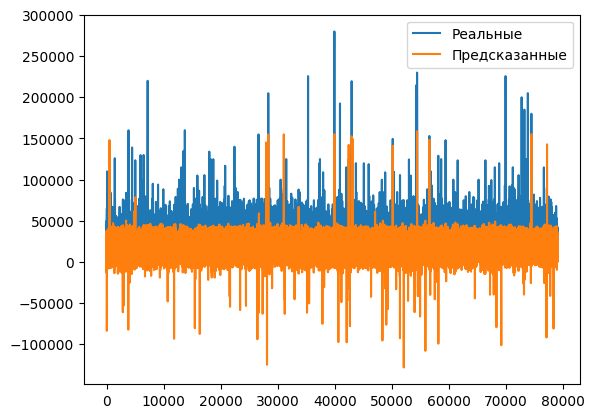

In [150]:
del real_pred['Абсолютная ошибка'] # Удалим столбец с абсолютной ошибкой перед построением графика
# Теперь можем сравнить графики на тестовой выборке (вместо набора X по оси Ox - номер наблюдения)
real_pred.reset_index(drop = True).plot()
plt.legend(loc = 'best')

In [151]:
print ('R^2 на тренировочной выборке: {0}'.format(model.score(X_train, y_train)))
print ('R^2 на прогнозе: {0}'.format(model.score(X_test, y_test)))

R^2 на тренировочной выборке: 0.5130108906636561
R^2 на прогнозе: 0.5154078650185663


In [152]:
mean_squared_error(y_test, y_pred)

86039206.74299906

In [153]:
mean_absolute_error(y_test, y_pred)

5869.661733582145

Попробуем теперь убрать столбцы с широтой и долготой, вместо них добавим dummy столбцы полученные из столбца state

In [154]:
df2 = df1.copy()
df2 = df2.drop(columns=['lat', 'long'], axis=1)
df2['state'] = df_car['state']
df2 = pd.get_dummies(df2, 'state')
df2

,price,year,odometer,posting month,posting day,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,35990,2010.0,32742.0,12,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7500,2014.0,93600.0,12,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4900,2006.0,87046.0,12,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2000,1974.0,190000.0,12,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,19500,2005.0,116000.0,12,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421117,19950,2017.0,101270.0,12,3,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
421118,14995,2014.0,83790.0,12,3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
421119,17895,2018.0,31888.0,12,3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
421120,17900,2014.0,53000.0,12,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Заново разделим данные, обучим модель и оценим ее

In [155]:
X = df2.drop('price', axis = 1)
y = df2['price']

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [157]:
real_pred = pd.DataFrame({'Реальные': y_test, 'Предсказанные': y_pred, 'Абсолютная ошибка': abs(y_pred - y_test)})
real_pred

,Реальные,Предсказанные,Абсолютная ошибка
217504,6700,10757.961770,4057.961770
73448,17895,21399.850166,3504.850166
66263,12000,12787.472876,787.472876
126683,9537,16403.642392,6866.642392
314951,9850,17544.988041,7694.988041
...,...,...,...
290332,5998,6271.254803,273.254803
420074,1000,7412.281760,6412.281760
328615,38000,24465.599029,13534.400971
142636,5500,10197.308849,4697.308849


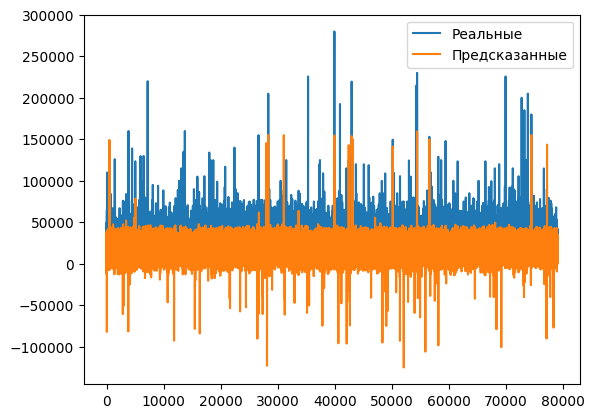

In [158]:
del real_pred['Абсолютная ошибка'] # Удалим столбец с абсолютной ошибкой перед построением графика
# Теперь можем сравнить графики на тестовой выборке (вместо набора X по оси Ox - номер наблюдения)
real_pred.reset_index(drop = True).plot()
plt.legend(loc = 'best')

In [159]:
print ('R^2 на тренировочной выборке: {0}'.format(model.score(X_train, y_train)))
print ('R^2 на прогнозе: {0}'.format(model.score(X_test, y_test)))

R^2 на тренировочной выборке: 0.5192152275308924
R^2 на прогнозе: 0.5219948021881081


In [160]:
mean_squared_error(y_test, y_pred)

84869697.77241896

In [161]:
mean_absolute_error(y_test, y_pred)

5859.649258045749

Точность немного улучшилась по всем метрикам

Коэффициент детерминации указывает, какой процент вариации цены объясняется влиянием выбранных нами столбцов.
Таким образом все признаки от которых пришлось избавиться в ходе обработки данных влияют примерно так же как те, что остались

Проведем анализ статистической значимости признаков

In [162]:
from sklearn.feature_selection import f_regression 
pvalues = f_regression(X, y)[1]
pvalues

array([0.00000000e+000, 0.00000000e+000, 6.75490220e-049, 1.14907924e-007,
       3.31540564e-089, 2.02259239e-015, 2.78299278e-066, 3.07708203e-103,
       2.19175548e-046, 5.36770302e-202, 5.16444353e-017, 1.79365774e-185,
       0.00000000e+000, 1.08532489e-001, 1.38501048e-086, 0.00000000e+000,
       8.71482155e-026, 0.00000000e+000, 0.00000000e+000, 3.92486861e-002,
       0.00000000e+000, 0.00000000e+000, 5.64714879e-003, 4.40621958e-030,
       2.49693845e-140, 4.59393110e-299, 2.59185783e-001, 4.58001625e-011,
       9.07958091e-023, 8.14863227e-190, 4.14882767e-237, 1.07661984e-245,
       1.78657285e-048, 9.75595496e-091, 4.05010763e-017, 0.00000000e+000,
       1.39769724e-279, 0.00000000e+000, 0.00000000e+000, 2.10599021e-179,
       4.15764894e-239, 1.12554032e-108, 0.00000000e+000, 4.42431002e-053,
       4.44659081e-323, 1.40092964e-060, 0.00000000e+000, 1.17120936e-213,
       0.00000000e+000, 5.94241621e-090, 0.00000000e+000, 0.00000000e+000,
       2.80429567e-061, 1

In [163]:
coef = pd.DataFrame([tuple(model.coef_), tuple(pvalues)])
coef.columns = [X.columns]
coef.index = ['coef', 'pvalues']
coef

,year,odometer,posting month,posting day,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
coef,399.78194,-0.059974,-8.680449e+02,-2.215971e+01,-5.874009e+03,-7.844203e+02,3.087669e+04,-3.018229e+03,-5.590381e+03,-7.279465e+03,...,941.648900,7.230874e+02,6.241314e+02,2.156284e+03,-8.508662e+02,-1.420008e+03,3179.520878,-8.729708e+02,4.062855e+02,2.702317e+03
pvalues,0.00000,0.000000,6.754902e-49,1.149079e-07,3.315406e-89,2.022592e-15,2.782993e-66,3.077082e-103,2.191755e-46,5.367703e-202,...,0.738227,4.252762e-13,4.160900e-74,1.192264e-18,1.965629e-77,4.565318e-09,0.000000,9.131639e-32,2.591796e-13,2.866754e-59


In [164]:
coef1 = coef.transpose()
coef1

,coef,pvalues
year,399.781940,0.000000e+00
odometer,-0.059974,0.000000e+00
posting month,-868.044914,6.754902e-49
posting day,-22.159715,1.149079e-07
manufacturer_acura,-5874.009027,3.315406e-89
...,...,...
state_vt,-1420.008401,4.565318e-09
state_wa,3179.520878,0.000000e+00
state_wi,-872.970774,9.131639e-32
state_wv,406.285542,2.591796e-13


Если p-value больше 0.05, то признак не считается значимым

In [165]:
coef1[coef1['pvalues'] > 0.05]

,coef,pvalues
manufacturer_datsun,2429.290611,0.108532
manufacturer_land rover,-5955.159434,0.259186
type_offroad,1183.709822,0.122568
state_10,156.985140,0.153479
state_co,203.673852,0.384872
state_ks,466.759804,0.057494
state_nc,372.164585,0.151122
state_nv,990.168439,0.379588
state_sc,479.173599,0.162041
state_sd,941.648900,0.738227


Посмотрим, что будет если удалить эти признаки

In [166]:
indexes = coef1[coef1['pvalues'] > 0.05].index.values.tolist()
indexes

[('manufacturer_datsun',),
 ('manufacturer_land rover',),
 ('type_offroad',),
 ('state_10',),
 ('state_co',),
 ('state_ks',),
 ('state_nc',),
 ('state_nv',),
 ('state_sc',),
 ('state_sd',)]

In [167]:
ind = []
for i in range(len(indexes)):
    ind.append(indexes[i][0])
ind

['manufacturer_datsun',
 'manufacturer_land rover',
 'type_offroad',
 'state_10',
 'state_co',
 'state_ks',
 'state_nc',
 'state_nv',
 'state_sc',
 'state_sd']

In [168]:
df3 = df2.copy()
df3 = df3.drop(columns=ind, axis=1)
df3

,price,year,odometer,posting month,posting day,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,...,state_ri,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,35990,2010.0,32742.0,12,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7500,2014.0,93600.0,12,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4900,2006.0,87046.0,12,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2000,1974.0,190000.0,12,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,19500,2005.0,116000.0,12,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421117,19950,2017.0,101270.0,12,3,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
421118,14995,2014.0,83790.0,12,3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
421119,17895,2018.0,31888.0,12,3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
421120,17900,2014.0,53000.0,12,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Теперь опять обучим и протестируем модель линейной регрессии

In [169]:
X = df3.drop('price', axis = 1)
y = df3['price']

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [171]:
real_pred = pd.DataFrame({'Реальные': y_test, 'Предсказанные': y_pred, 'Абсолютная ошибка': abs(y_pred - y_test)})
real_pred

,Реальные,Предсказанные,Абсолютная ошибка
217504,6700,10809.076231,4109.076231
73448,17895,21408.471230,3513.471230
66263,12000,12992.241340,992.241340
126683,9537,16402.995216,6865.995216
314951,9850,17544.228776,7694.228776
...,...,...,...
290332,5998,6269.683368,271.683368
420074,1000,7410.863985,6410.863985
328615,38000,23946.775350,14053.224650
142636,5500,10195.755146,4695.755146


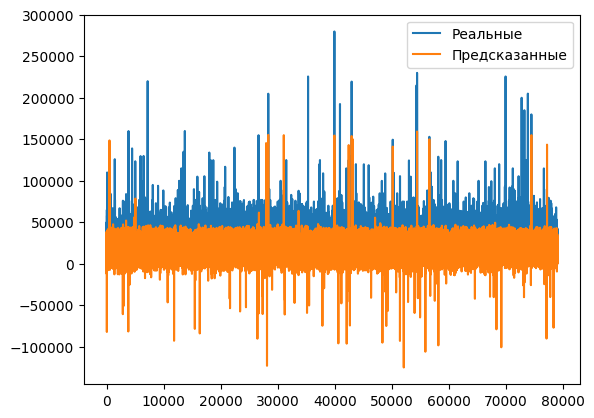

In [172]:
del real_pred['Абсолютная ошибка'] # Удалим столбец с абсолютной ошибкой перед построением графика
# Теперь можем сравнить графики на тестовой выборке (вместо набора X по оси Ox - номер наблюдения)
real_pred.reset_index(drop = True).plot()
plt.legend(loc = 'best')

In [173]:
print ('R^2 на тренировочной выборке: {0}'.format(model.score(X_train, y_train)))
print ('R^2 на прогнозе: {0}'.format(model.score(X_test, y_test)))

R^2 на тренировочной выборке: 0.5191752844058621
R^2 на прогнозе: 0.5219623496860157


In [174]:
mean_squared_error(y_test, y_pred)

84875459.70567228

In [175]:
mean_absolute_error(y_test, y_pred)

5859.706117265114

Ошибка незначительно выросла по сравнению с данными до удаления столбцов, для которых p-value > 0.05

## Дерево решений 

Будем использовать данные, записанные в df1, df2, df3

Разделим выборку

In [176]:
X = df1.drop('price', axis = 1)
y = df1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

Инициализируем и обучаем модель

In [177]:
from sklearn.tree import DecisionTreeRegressor 

model_dt = DecisionTreeRegressor(random_state = 42, criterion = 'squared_error', max_depth = 25, min_samples_leaf = 5)
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=25, min_samples_leaf=5, random_state=42)

Используем модель на тестовых данных

In [178]:
y_pred_dt = model_dt.predict(X_test) 

Рассмотрим признаки по важности

In [179]:
pd.DataFrame({'feature': X.columns,
              'importance': model_dt.feature_importances_}).sort_values('importance', ascending = False)

,feature,importance
0,year,3.709363e-01
2,odometer,1.467842e-01
64,drive_fwd,8.923142e-02
49,fuel_diesel,6.315438e-02
1,cylinders,5.956457e-02
...,...,...
43,manufacturer_saturn,2.078776e-07
37,manufacturer_morgan,0.000000e+00
68,type_bus,0.000000e+00
29,manufacturer_land rover,0.000000e+00


Как и в случае линейной регрессии год и пробег являются наиболее важными признаками

<AxesSubplot: >

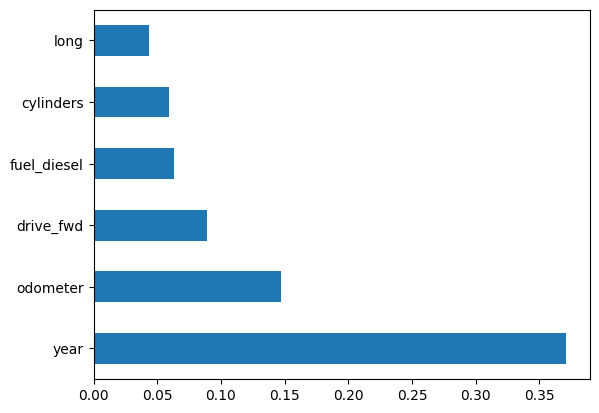

In [180]:
pd.Series(model_dt.feature_importances_,
          index = X.columns).nlargest(6).plot(kind='barh')

Рассмотрим метрики качества

In [181]:
print ('R^2 на прогнозе: {0}'.format(r2_score(y_test, y_pred_dt)))

R^2 на прогнозе: 0.7848360944500414


In [182]:
mean_squared_error(y_test, y_pred_dt)

38202295.119695425

In [183]:
mean_absolute_error(y_test, y_pred_dt)

3194.0313924892184

Точность значительно выросла по сравнению с линейной регрессией

Сравним предссказзные значения с реальными

In [184]:
real_pred_dt = pd.DataFrame({'Реальные': y_test, 'Предсказанные': y_pred_dt, 'Абсолютная ошибка': abs(y_pred_dt - y_test)})
real_pred_dt

,Реальные,Предсказанные,Абсолютная ошибка
217504,6700,5281.883178,1418.116822
73448,17895,18493.833333,598.833333
66263,12000,14788.800000,2788.800000
126683,9537,15649.166667,6112.166667
314951,9850,8372.500000,1477.500000
...,...,...,...
290332,5998,9015.125000,3017.125000
420074,1000,5208.865719,4208.865719
328615,38000,23690.584071,14309.415929
142636,5500,6298.600000,798.600000


Теперь посмотрим как покажет себя модель, обученная на немного измененных данных (df2)

Разделим выборку на тестовую и тренировочную, обучим модель и протестируем ее на тестовых данных

In [185]:
X = df2.drop('price', axis = 1)
y = df2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test) 

Рассмотрим важность признаков

In [186]:
pd.DataFrame({'feature': X.columns,
              'importance': model_dt.feature_importances_}).sort_values('importance', ascending = False)

,feature,importance
0,year,0.382111
1,odometer,0.156285
61,drive_fwd,0.091863
46,fuel_diesel,0.064221
97,state_8,0.040817
...,...,...
109,state_hi,0.000000
34,manufacturer_morgan,0.000000
26,manufacturer_land rover,0.000000
19,manufacturer_harley-davidson,0.000000


Год и пробег так же остаются самыми важными признаками, однако их важность стала немного выше

Теперь оценим точность модели

In [187]:
print ('R^2 на прогнозе: {0}'.format(r2_score(y_test, y_pred_dt)))
print('MSE: ', mean_squared_error(y_test, y_pred_dt))
print('MAE: ', mean_absolute_error(y_test, y_pred_dt))

R^2 на прогнозе: 0.775514207747563
MSE:  39857393.66408282
MAE:  3278.1912008548643


Точность незначительно понизилась

Проверим теперь модель обученную на df3

Разделим выборку на тестовую и тренировочную, обучим модель и протестируем ее на тестовых данных

In [188]:
X = df3.drop('price', axis = 1)
y = df3['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test) 

Рассмотрим важность признаков

In [189]:
pd.DataFrame({'feature': X.columns,
              'importance': model_dt.feature_importances_}).sort_values('importance', ascending = False)

,feature,importance
0,year,0.382132
1,odometer,0.158212
59,drive_fwd,0.091793
44,fuel_diesel,0.064270
93,state_8,0.040766
...,...,...
32,manufacturer_morgan,0.000000
52,title_status_parts only,0.000000
104,state_hi,0.000000
137,state_wv,0.000000


Теперь оценим точность модели

In [190]:
print ('R^2 на прогнозе: {0}'.format(r2_score(y_test, y_pred_dt)))
print('MSE: ', mean_squared_error(y_test, y_pred_dt))
print('MAE: ', mean_absolute_error(y_test, y_pred_dt))

R^2 на прогнозе: 0.7721113339370896
MSE:  40461573.01856382
MAE:  3282.957987943174


Точность стала ниже, чем при модели, обученной на df2

Наиболее хорошо себя показала модель обученная на данных df1, где используются географические координаты, вместо штатов и не удалены признаки, которые были нами отсеяны по f-критерию

## Случайный лес 

Импортируем модель

In [191]:
from sklearn.ensemble import RandomForestRegressor

задаем параметры модели

In [192]:
rf = RandomForestRegressor(random_state = 42, 
                               n_estimators = 10,  
                               max_depth = 25, 
                               min_samples_leaf = 5) 

Делаем тестовую и тренировочную выборки из df1

In [193]:
X = df1.drop('price', axis = 1)
y = df1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

Тренеруем модель и тестируем

In [194]:
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
real_pred_rf = pd.DataFrame({'Реальные': y_test, 'Предсказанные': y_pred_rf, 'Абсолютная ошибка': abs(y_pred_rf - y_test)})
real_pred_rf

,Реальные,Предсказанные,Абсолютная ошибка
217504,6700,6018.411686,681.588314
73448,17895,20402.796137,2507.796137
66263,12000,14198.426957,2198.426957
126683,9537,17494.361906,7957.361906
314951,9850,8389.158896,1460.841104
...,...,...,...
290332,5998,8187.915379,2189.915379
420074,1000,5508.680872,4508.680872
328615,38000,22602.001406,15397.998594
142636,5500,6270.313827,770.313827


Оцениваем точность модели

In [195]:
print ('R^2 на прогнозе: {0}'.format(r2_score(y_test, y_pred_rf)))
print('MSE: ', mean_squared_error(y_test, y_pred_rf))
print('MAE: ', mean_absolute_error(y_test, y_pred_rf))

R^2 на прогнозе: 0.8263483898859801
MSE:  30831797.929257046
MAE:  2888.071669502683


Получилась наиболее высокая точность среди всех рассмотренных вариантов и моделей

Рассмотрим важность признаков

In [196]:
pd.DataFrame({'feature': X.columns,
              'importance': rf.feature_importances_}).sort_values('importance', ascending = False)

,feature,importance
0,year,0.369970
2,odometer,0.146392
64,drive_fwd,0.089609
49,fuel_diesel,0.063694
1,cylinders,0.061261
...,...,...
22,manufacturer_harley-davidson,0.000010
43,manufacturer_saturn,0.000002
57,title_status_parts only,0.000000
37,manufacturer_morgan,0.000000


Теперь попробуем обучить и протестировать модель на df2

In [197]:
X = df2.drop('price', axis = 1)
y = df2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
real_pred_rf = pd.DataFrame({'Реальные': y_test, 'Предсказанные': y_pred_rf, 'Абсолютная ошибка': abs(y_pred_rf - y_test)})
real_pred_rf

,Реальные,Предсказанные,Абсолютная ошибка
217504,6700,5067.381693,1632.618307
73448,17895,21165.356517,3270.356517
66263,12000,12820.236433,820.236433
126683,9537,16958.061731,7421.061731
314951,9850,8060.194641,1789.805359
...,...,...,...
290332,5998,8169.264698,2171.264698
420074,1000,5352.899882,4352.899882
328615,38000,21755.043921,16244.956079
142636,5500,4687.824658,812.175342


Оценим точность

In [198]:
print ('R^2 на прогнозе: {0}'.format(r2_score(y_test, y_pred_rf)))
print('MSE: ', mean_squared_error(y_test, y_pred_rf))
print('MAE: ', mean_absolute_error(y_test, y_pred_rf))

R^2 на прогнозе: 0.8090602284612269
MSE:  33901306.46572487
MAE:  3039.4420450568227


Точность стала незначительно ниже

Рассмотрим важность признаков

In [199]:
pd.DataFrame({'feature': X.columns,
              'importance': rf.feature_importances_}).sort_values('importance', ascending = False)

,feature,importance
0,year,0.381792
1,odometer,0.159486
61,drive_fwd,0.092471
46,fuel_diesel,0.064967
97,state_8,0.041321
...,...,...
123,state_ms,0.000002
109,state_hi,0.000000
54,title_status_parts only,0.000000
34,manufacturer_morgan,0.000000


Рассмотрим модель обученную на данных из df3

In [200]:
X = df3.drop('price', axis = 1)
y = df3['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
real_pred_rf = pd.DataFrame({'Реальные': y_test, 'Предсказанные': y_pred_rf, 'Абсолютная ошибка': abs(y_pred_rf - y_test)})
real_pred_rf

,Реальные,Предсказанные,Абсолютная ошибка
217504,6700,5430.939991,1269.060009
73448,17895,21414.673184,3519.673184
66263,12000,12803.838814,803.838814
126683,9537,16885.343214,7348.343214
314951,9850,8249.298808,1600.701192
...,...,...,...
290332,5998,8169.264698,2171.264698
420074,1000,5186.488762,4186.488762
328615,38000,21755.043921,16244.956079
142636,5500,5028.216722,471.783278


Оценим точность

In [201]:
print ('R^2 на прогнозе: {0}'.format(r2_score(y_test, y_pred_rf)))
print('MSE: ', mean_squared_error(y_test, y_pred_rf))
print('MAE: ', mean_absolute_error(y_test, y_pred_rf))

R^2 на прогнозе: 0.8090664100222937
MSE:  33900208.93117525
MAE:  3041.106566499997


Наиболее точной оказалась модель, обученная на df1

Рассмотрим важность признаков

In [202]:
pd.DataFrame({'feature': X.columns,
              'importance': rf.feature_importances_}).sort_values('importance', ascending = False)

,feature,importance
0,year,0.381856
1,odometer,0.160006
59,drive_fwd,0.092433
44,fuel_diesel,0.064983
93,state_8,0.041277
...,...,...
38,manufacturer_saturn,0.000003
117,state_ms,0.000002
104,state_hi,0.000000
32,manufacturer_morgan,0.000000


Если сравнивать все обученные модели, то лучше всего себя ожидаемо показал случайный лес.
Незначительно хуже показало себя дерево решений.
Линейная регрессия показала себя заметно хуже.


Нами тестировались модели, обученные на нескольких, отличающихся друг от друга наборах данных.
Лучше себя показывали модели, в которых вместо данных о штате использовались данные о географических координатах.
Также было замечено, что удаление признаков по f-критерию незначительно понижало точность моделей, обученных на таких данных.
Наиболее важными признаками для ценообразования стали возраст автомобиля и его пробег, что логично

## Вывод 

В результате проделанной работы было завершено преобразование данных. 
Далее были созданы несколько различных наборов данных с некоторыми различиями между собой.
(Первый набор - изначальный, второй - из изначального убрали данные о географических координатах и добавили вместо них dummy столбцы со штатами,
третий - из второго убрали признаки по f-критерию)
На основе каждого набора были обучены модели линейной регрессии, дерева решений и случайного леса.
Лучше всего себя показали модели случайного леса, незначительно хуже деревья решений и сильно хуже модели линейной регрессии.
В случаях дерева решений и случайного леса модели, обученные на первом наборе данных показали большую точность по сравнению с теми же моделями, но обученными на других наборах данных.
В случае же линейной регрессии модели, обученные на втором наборе данных показали себя лучше всего, чуть хуже  показали себя обученные на 3 и 1 наборе данных модели
Наиболее важными факторами из оставшихся в наборе оказались возраст и пробег машины.